[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tgaedt/workshop_uv/blob/main/notebooks/0_start.ipynb)



In [2]:
%%bash

git clone --depth 1 --filter=blob:none --sparse https://github.com/tgaedt/workshop_uv.git

cd workshop_uv
git sparse-checkout set data

Cloning into 'workshop_uv'...


# Data Exploration and Visualization of Calorimetry Data

The code above creates a folder inside the colab runtime with the calorimetry data. This is ephemeral data, i.e., it is lost when the colab runtime is shutdown (which happens automatically).

Next, we will show how the data can be loaded and plotted using conventional tools such as `pandas` and `matplotlib`.




In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pathlib

folder = pathlib.Path("workshop_uv/data/calo")

df = pd.concat(
    [pd.read_csv(f) for f in folder.glob("*.csv")],
)

df

,time_s,temperature_c,heat_flow_w,heat_j,normalized_heat_flow_w_g,normalized_heat_j_g,sample,sample_short,temperature_ambientt_therm3t_c,temperature_temperature_c,comments_nan
0,3611.037066,20.0,0.000114,76.869919,0.000028,19.217480,/home/torben/LRZ Sync+Share/0_TUM/10_Coding/0_...,JAA_CAL716,NaN,NaN,NaN
1,4129.695025,20.0,0.000104,76.926600,0.000026,19.231650,/home/torben/LRZ Sync+Share/0_TUM/10_Coding/0_...,JAA_CAL716,NaN,NaN,NaN
2,4630.023150,20.0,0.000098,76.977372,0.000025,19.244343,/home/torben/LRZ Sync+Share/0_TUM/10_Coding/0_...,JAA_CAL716,NaN,NaN,NaN
3,5219.939654,20.0,0.000093,77.033889,0.000023,19.258472,/home/torben/LRZ Sync+Share/0_TUM/10_Coding/0_...,JAA_CAL716,NaN,NaN,NaN
4,5857.452837,20.0,0.000089,77.091527,0.000022,19.272882,/home/torben/LRZ Sync+Share/0_TUM/10_Coding/0_...,JAA_CAL716,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
744,255466.434987,20.0,0.000981,839.262916,0.000245,209.815729,/home/torben/LRZ Sync+Share/0_TUM/10_Coding/0_...,JAA_CAL721,NaN,NaN,NaN
745,256921.597462,20.0,0.000977,840.688188,0.000244,210.172047,/home/torben/LRZ Sync+Share/0_TUM/10_Coding/0_...,JAA_CAL721,NaN,NaN,NaN
746,258151.694630,20.0,0.000973,841.888038,0.000243,210.472010,/home/torben/LRZ Sync+Share/0_TUM/10_Coding/0_...,JAA_CAL721,NaN,NaN,NaN
747,259206.729370,20.0,0.000971,842.913413,0.000243,210.728353,/home/torben/LRZ Sync+Share/0_TUM/10_Coding/0_...,JAA_CAL721,NaN,NaN,NaN


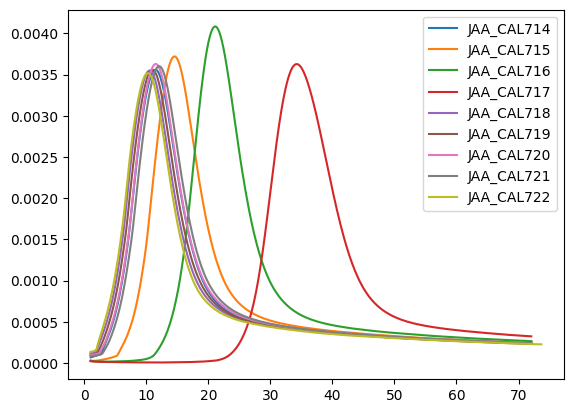

In [9]:
fig, ax = plt.subplots()
for smp, smp_df in df.groupby("sample_short"):
    ax.plot(smp_df.time_s/3600, smp_df.normalized_heat_flow_w_g, label=smp)
plt.legend()
plt.show()